# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [2]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [33]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
    if Distance_Type == 'euclidean':
        distances = np.sqrt(((Data_points[:, np.newaxis, :] - Cluster_Centroids)**2).sum(axis=2))
    elif Distance_Type == 'pearson':
        distances = np.zeros((Data_points.shape[0], Cluster_Centroids.shape[0]))
        for i in range(Cluster_Centroids.shape[0]):
            for j in range(Data_points.shape[0]):
                distances[j][i] = 1 - np.corrcoef(Data_points[j], Cluster_Centroids[i])[0][1]
    return distances

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [4]:
def GUC_Kmeans(Data_points, Number_of_Clusters, Distance_Type='euclidean', Max_Iterations=100):
    num_points, num_features = Data_points.shape
    cluster_centroids = Data_points[np.random.choice(num_points, Number_of_Clusters, replace=False), :]
    cluster_assignments = np.zeros(num_points, dtype=int)
    mean_square_distances = np.zeros(Number_of_Clusters)
    for i in range(Max_Iterations):
        # Cluster assignment
        distances = GUC_Distance(cluster_centroids, Data_points, Distance_Type=Distance_Type)
        min_distances = distances.min(axis=1)
        min_indices = distances.argmin(axis=1)
        cluster_assignments = min_indices
        # Calculate mean square distances
        for k in range(Number_of_Clusters):
            mean_square_distances[k] = ((Data_points[cluster_assignments == k, :] - cluster_centroids[k, :])**2).mean()
        # Check stopping condition
        if np.sum(mean_square_distances) < 1e-6:
            break
        # Update cluster centroids
        for k in range(Number_of_Clusters):
            cluster_centroids[k, :] = Data_points[cluster_assignments == k, :].mean(axis=0)
    # Calculate final cluster distances
    final_cluster_distances = GUC_Distance(cluster_centroids, Data_points, Distance_Type=Distance_Type)
    # Calculate cluster metric (distortion function)
    cluster_metric = ((Data_points - cluster_centroids[cluster_assignments, :])**2).sum()

    return final_cluster_distances, cluster_metric



## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [5]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [6]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
# def display_cluster(X,km=[],num_clusters=0):
#    color = 'brgcmyk'  #List colors
#    alpha = 0.5  #color obaque
   # s = 20
  #  if num_clusters == 0:
 #       plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
#    else:
#       for i in range(num_clusters):
#            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
#            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

def display_cluster(X, km=None, num_clusters=0):
    if km is None:
        plt.scatter(X[:,0], X[:,1])
        plt.title("Raw data")
    else:
        color = 'brgcmyk'  #List colors
        alpha = 0.5
        s = 30
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
        

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

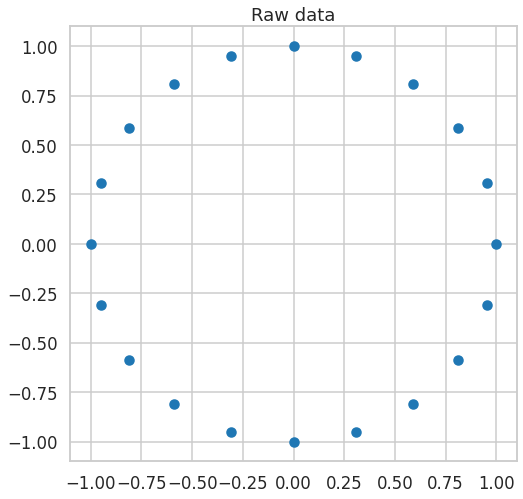

In [7]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

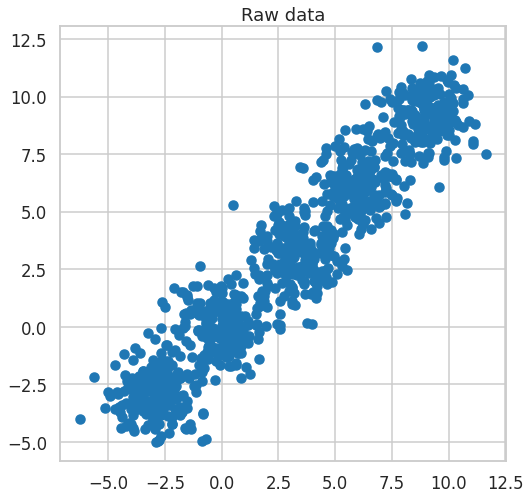

In [8]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

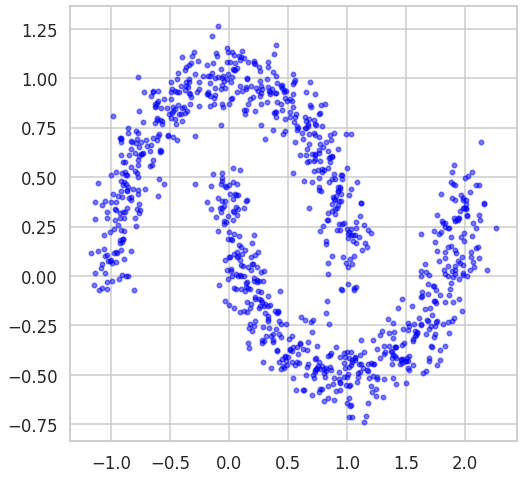

In [11]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

<ipython-input-10-5844b3c86b7f>:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,8))


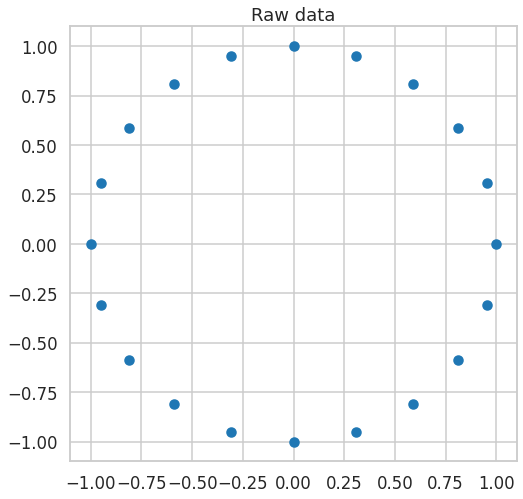

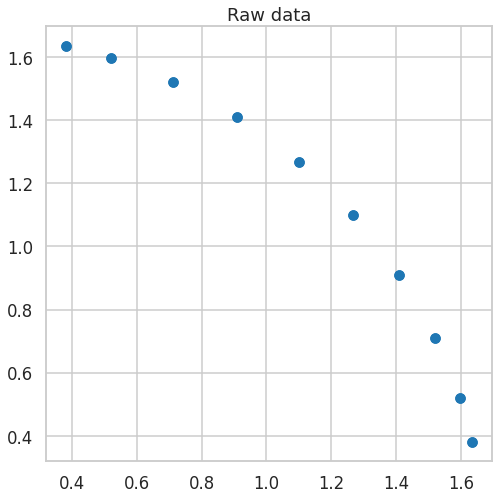

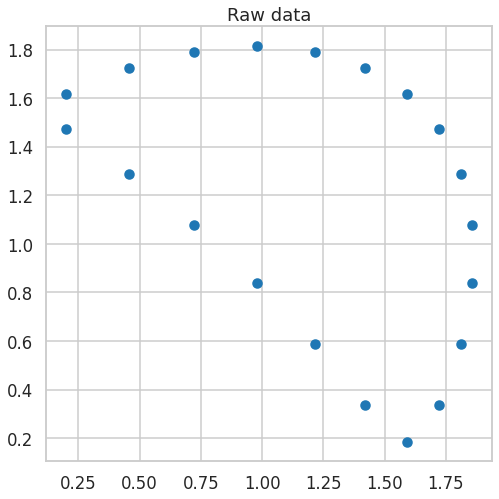

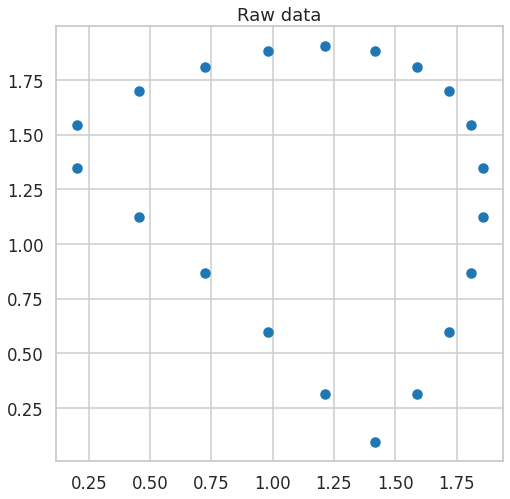

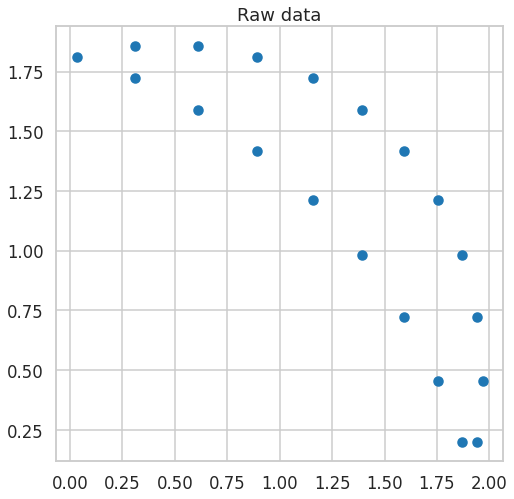

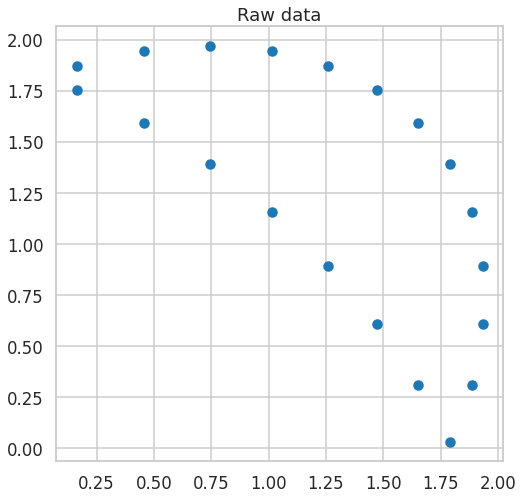

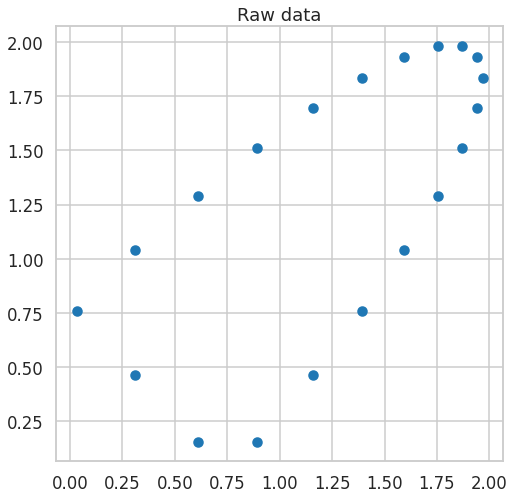

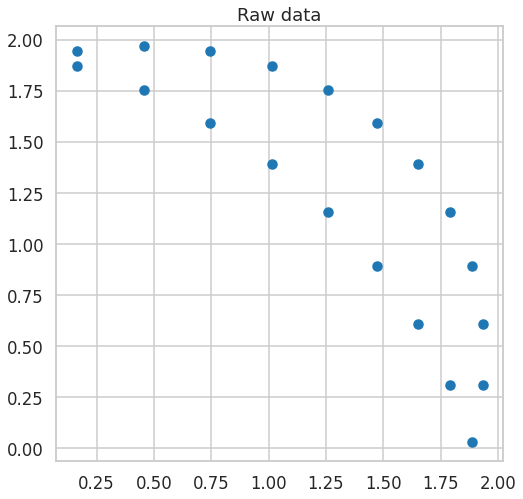

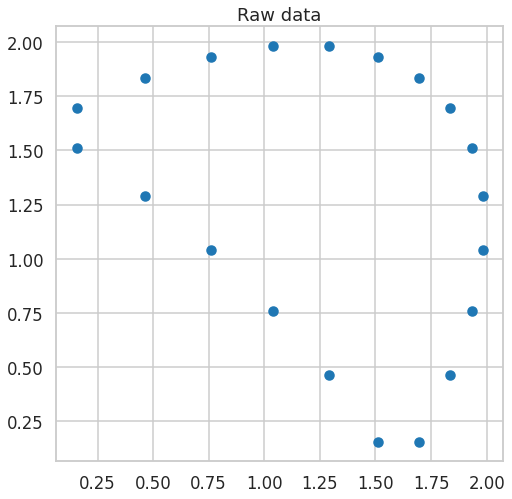

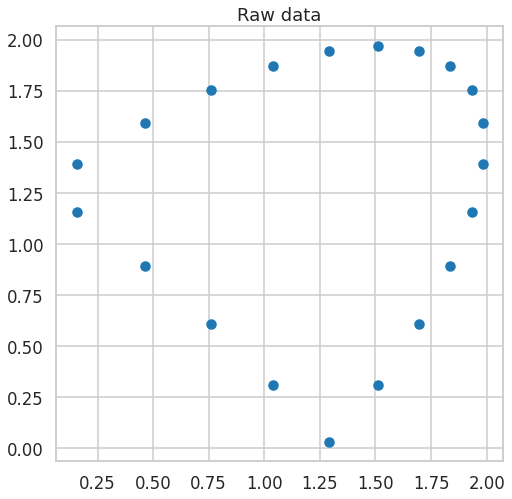

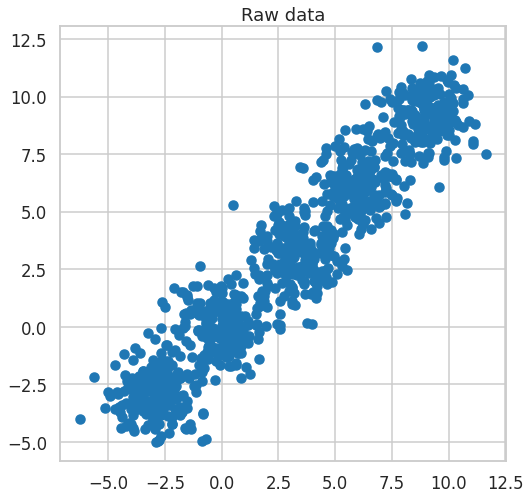

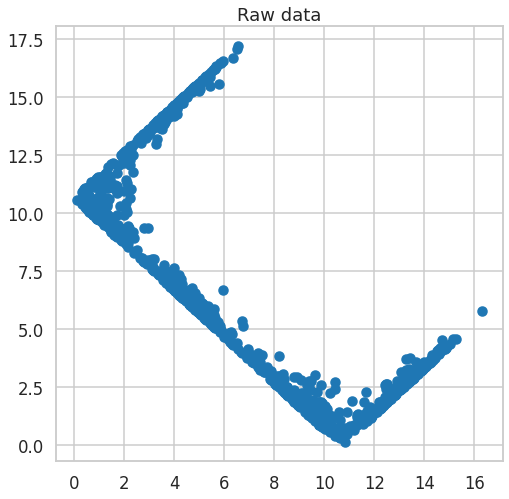

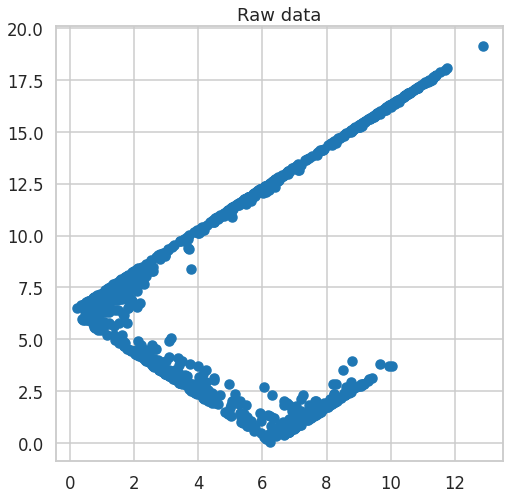

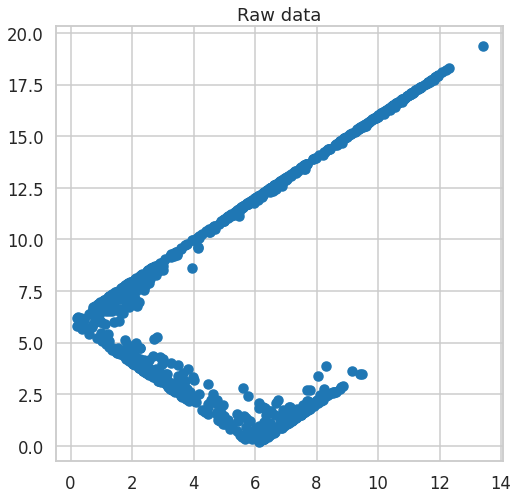

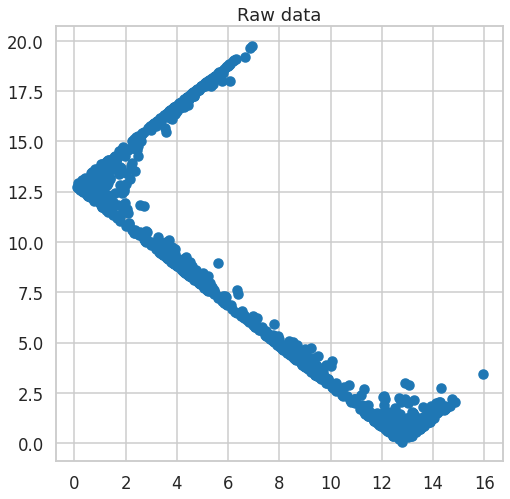

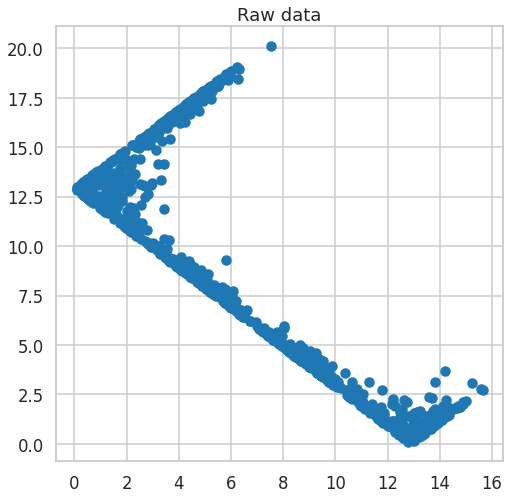

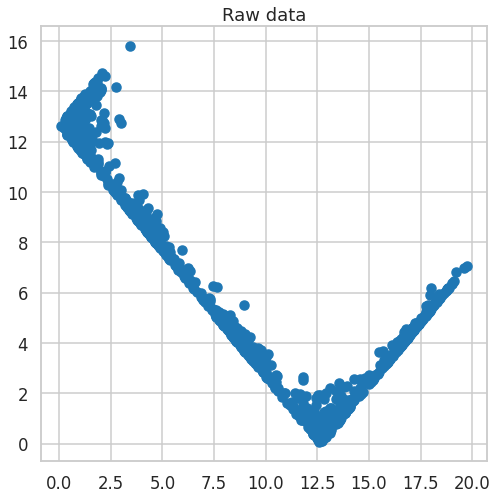

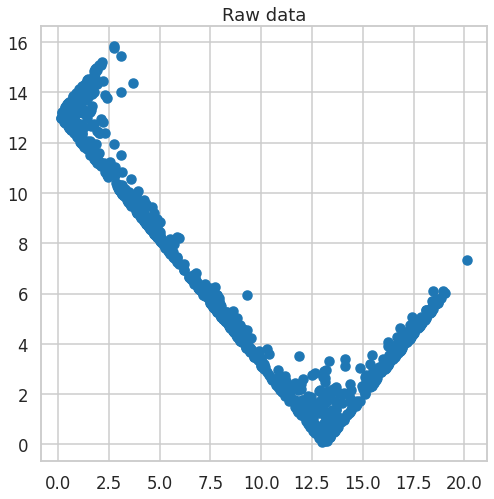

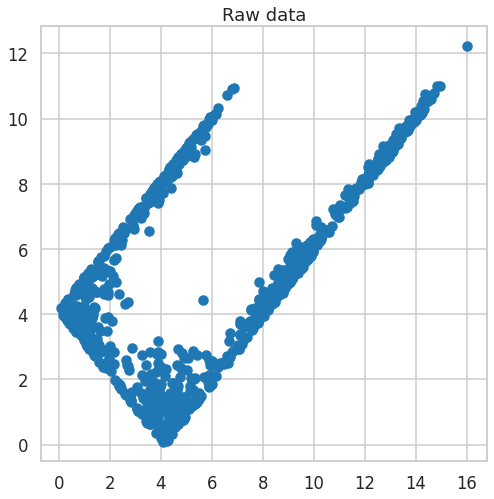

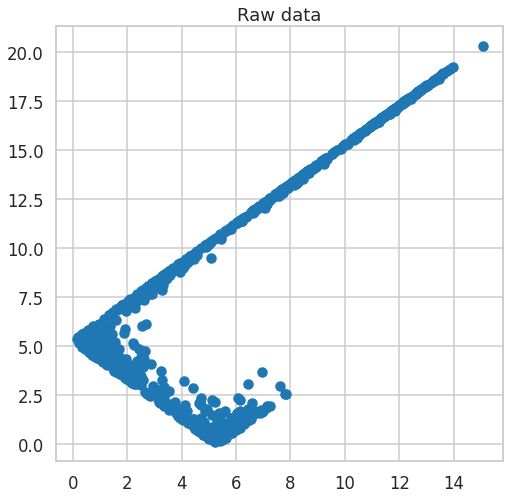

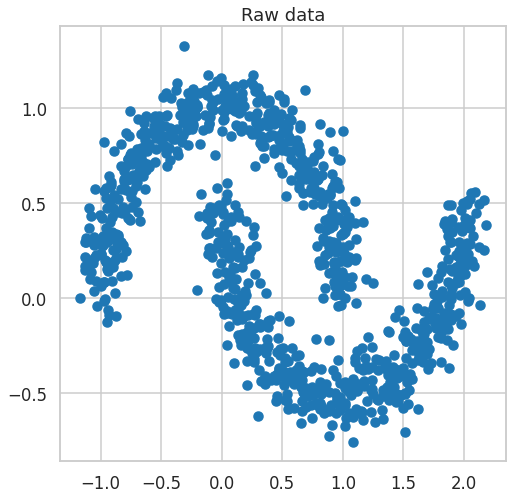

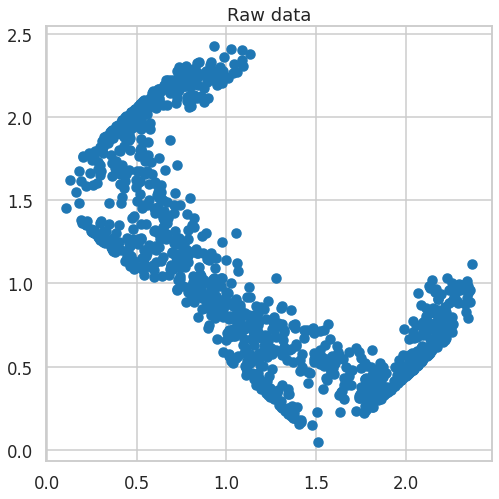

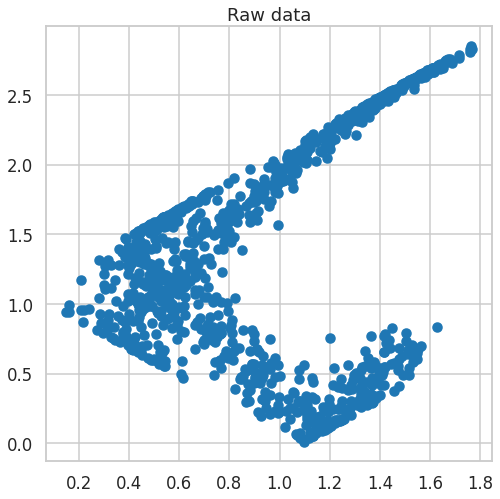

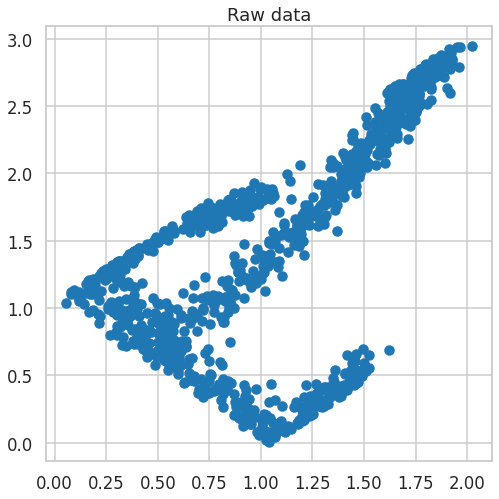

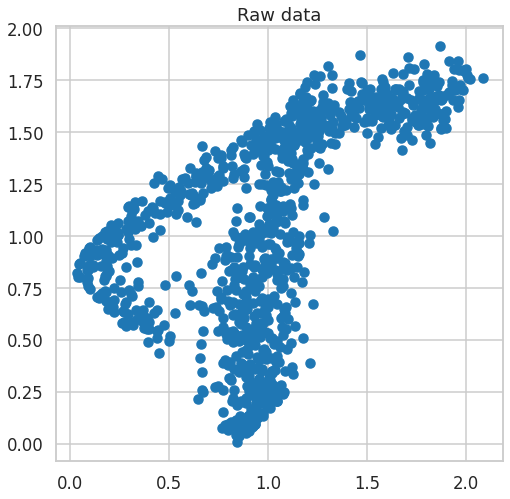

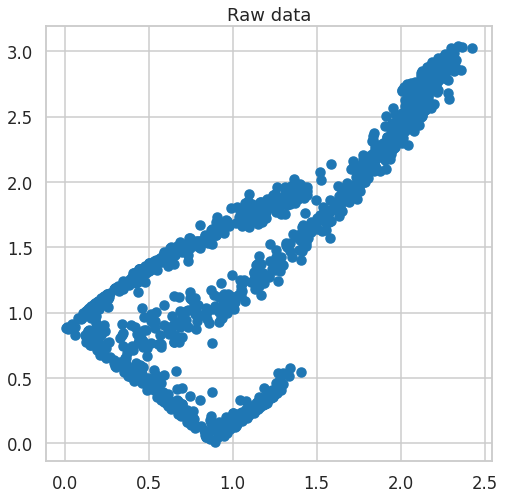

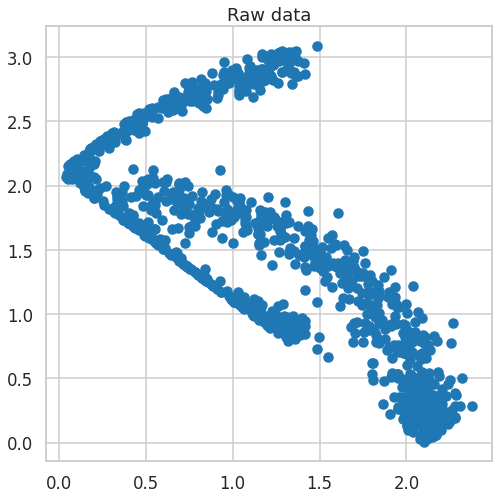

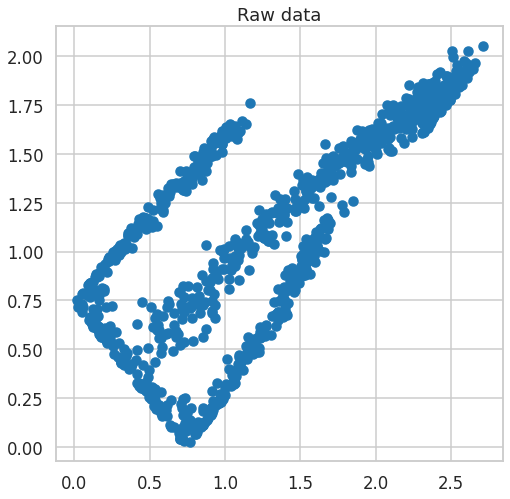

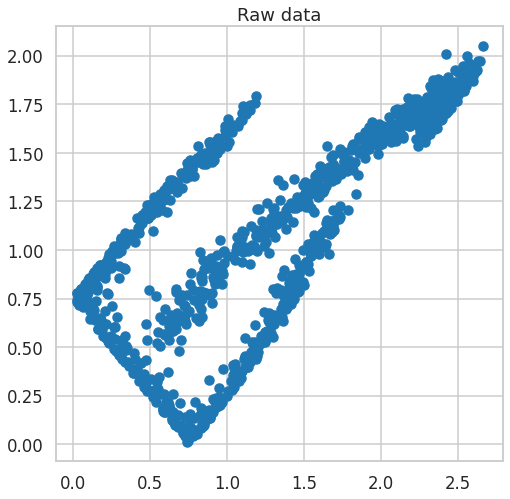

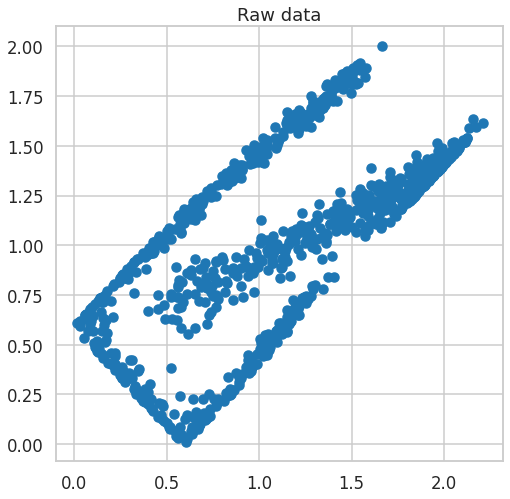

In [10]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
import seaborn as sns

MAX_ITERATIONS = 100
MIN_CLUSTERS = 2
MAX_CLUSTERS = 10

# Example 1
angle = np.linspace(0, 2*np.pi, 20, endpoint=False)
X1 = np.append([np.cos(angle)], [np.sin(angle)], 0).transpose()
plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
sns.set_context("talk")
plt.title("Circular data")
display_cluster(X1)

for k in range(MIN_CLUSTERS, MAX_CLUSTERS+1):
    final_cluster_distances, cluster_metric = GUC_Kmeans(X1, k, Distance_Type='euclidean', Max_Iterations=MAX_ITERATIONS)
    plt.figure(figsize=(8,8))
    sns.set_style("whitegrid")
    sns.set_context("talk")
    plt.title("Circular data with {} clusters".format(k))
    display_cluster(final_cluster_distances, km=None, num_clusters=k)

# Example 2: Multi-blob data
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y2 = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                    centers=centers, shuffle=False, random_state=42)

plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
sns.set_context("talk")
plt.title("Multi-blob data")
display_cluster(X2)

for k in range(MIN_CLUSTERS, MAX_CLUSTERS+1):
    final_cluster_distances, cluster_metric = GUC_Kmeans(X2, k, Distance_Type='euclidean', Max_Iterations=MAX_ITERATIONS)
    plt.figure(figsize=(8,8))
    sns.set_style("whitegrid")
    sns.set_context("talk")
    plt.title("Multi-blob data with {} clusters".format(k))
    display_cluster(final_cluster_distances, km=None, num_clusters=k)

# Example 3: Moons data
n_samples = 1000
X3, y3 = noisy_moons = make_moons(n_samples=n_samples, noise=.1)

plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
sns.set_context("talk")
plt.title("Moons data")
display_cluster(X3)

for k in range(MIN_CLUSTERS, MAX_CLUSTERS+1):
    final_cluster_distances, cluster_metric = GUC_Kmeans(X3, k, Distance_Type='euclidean', Max_Iterations=MAX_ITERATIONS)
    plt.figure(figsize=(8,8))
    sns.set_style("whitegrid")
    sns.set_context("talk")
    plt.title("Moons data with {} clusters".format(k))
    display_cluster(final_cluster_distances, km=None, num_clusters=k)



## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

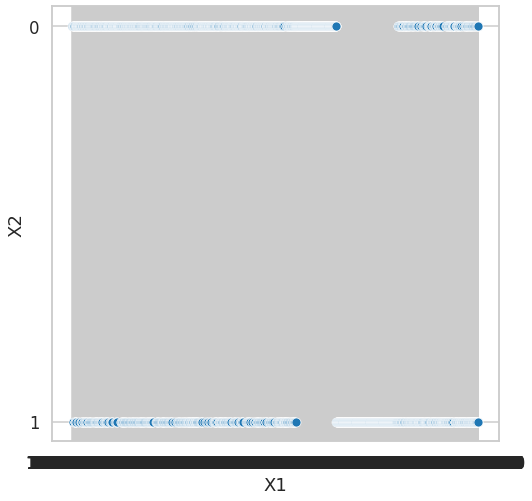

UFuncTypeError: ignored

In [34]:
import csv
import numpy as np
MAX_ITERATIONS = 100
MIN_CLUSTERS = 2
MAX_CLUSTERS = 10
with open('/Customer data.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # skip header row
    data = [row for row in reader] 
    X1 = np.array(list(zip(*data)))           
    plt.figure(figsize=(8,8))
    sns.set_style("whitegrid")
    sns.scatterplot(x=X1[0], y=X1[1])
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

for k in range(MIN_CLUSTERS, MAX_CLUSTERS+1):

    final_cluster_distances, cluster_metric = GUC_Kmeans(X1, k, Distance_Type='euclidean', Max_Iterations=MAX_ITERATIONS)
    plt.figure(figsize=(8,8))
    sns.set_style("whitegrid")
    sns.set_context("talk")
    plt.title(f"K-Means with {k} Clusters")
    display_cluster(final_cluster_distances, km=None, num_clusters=k)
